Test RMSE: 0.0273


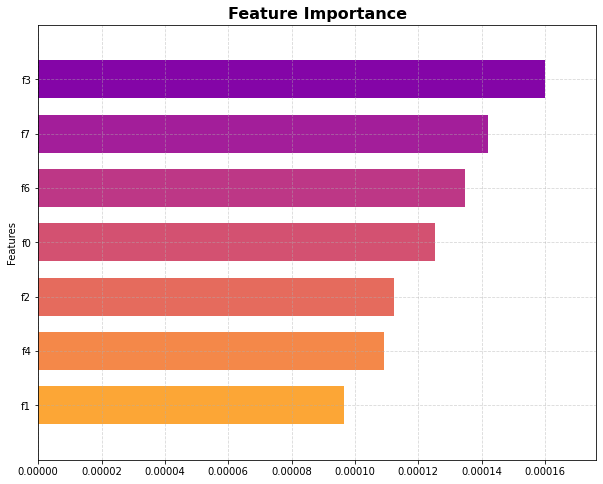

<Figure size 432x288 with 0 Axes>

Permutation Importance Scores:
X8: 0.1512
X6: 0.0000
X7: -0.0269
X5: -0.0294
X2: -0.0489
X3: -0.0832
X4: -0.1103
X1: -0.1373


In [27]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv("/root/2023mcm/new_data.csv")
X = data.iloc[:, [12, 13, 14, 15, 16, 17, 19,20]].values
y = data.iloc[:, -1].values

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练XGBoost模型
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, max_depth=6, learning_rate=0.1)
model.fit(X_train, y_train)

# 评估模型性能
test_loss = np.sqrt(np.mean(np.square(y_test - model.predict(X_test))))
print("Test RMSE: {:.4f}".format(test_loss))

# 输出特征重要性分数
import os

# 如果目录不存在，则创建目录
if not os.path.exists('/root/2023mcm/q1'):
    os.makedirs('/root/2023mcm/q1')

# 设置保存图片的路径
path = '/root/2023mcm/q1/feature_importance.jpeg'

# 绘制特征重要性图像，并保存到指定路径
# Create a gradient color scheme
color = np.linspace(0.2, 1, 10)
color = plt.cm.get_cmap('plasma_r')(color)

fig, ax = plt.subplots(figsize=(10, 8))

xgb.plot_importance(model, height=0.7, color=color, ax=ax, title='Feature Importance', grid=False, xlabel=None, 
                    importance_type='gain', show_values=False, max_num_features=None, xlim=None, ylim=None,)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.title("Feature Importance",fontweight='bold',fontsize=16)
plt.savefig(path, bbox_inches='tight')
plt.show()

# add numeric labels to the bars
for i, v in enumerate(model.feature_importances_):
    ax.text(v + 0.01, i + .25, str(round(v,3)), color='black', fontweight='bold',ha='left',va='center')
# adjust spacing and save the figure
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plt.savefig(path, bbox_inches='tight')
plt.show()


# 进行Permutation Importance分析
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)

# 输出特征重要性分数
print("Permutation Importance Scores:")
for i in result.importances_mean.argsort()[::-1]:
    print("X{}: {:.4f}".format(i+1, result.importances_mean[i]))


In [21]:
 result.importances_mean[1]

-0.0489403017209449